In [2]:
using SymPy

In [3]:
@vars a t s

(a, t, s)

In [4]:
g1(t)=^(sin(t),2)

g1 (generic function with 1 method)

In [5]:
g1(pi/2)

1.0

In [1]:
using SymPy

In [2]:
@vars s

(s,)

In [3]:
apart(/(*(2,s),^(-(^(s,2),1),2)))

      1            1     
- ────────── + ──────────
           2            2
  2⋅(s + 1)    2⋅(s - 1) 

In [1]:
using SymPy

In [3]:
@vars t

(t,)

In [2]:
A=[1 3  7 0
0 -1 -4 0
0 1 3 0
0 -6 -14 1]

4×4 Matrix{Int64}:
 1   3    7  0
 0  -1   -4  0
 0   1    3  0
 0  -6  -14  1

In [4]:
exp(*(A,t))

4×4 Matrix{Sym}:
 exp(t)  t^2*exp(t)/2 + 3*t*exp(t)  …       0
      0       -2*t*exp(t) + exp(t)          0
      0                   t*exp(t)          0
      0   -t^2*exp(t) - 6*t*exp(t)     exp(t)

In [21]:
using SymPy

In [2]:
@vars x

(x,)

In [6]:
SymPy.integrate(^(cos(x),2))

x   sin(x)⋅cos(x)
─ + ─────────────
2         2      

In [12]:
using RCall
R"sample(seq(1,10,1),2)"

RObject{RealSxp}
[1] 2 7


In [3]:
SymPy.integrate(*(x,sympy.sin(x)))

-x⋅cos(x) + sin(x)

In [22]:
@vars s

(s,)

In [6]:
apart(/(1,+(^(s,2),*(110,s),1000)))

       1              1     
- ──────────── + ───────────
  90⋅(s + 100)   90⋅(s + 10)

In [18]:
using Polynomials

In [34]:
p1=Polynomial([8,4,1])

Polynomial(8 + 4*x + x^2)

In [35]:
Polynomials.roots(p1)

2-element Vector{ComplexF64}:
 -1.9999999999999996 - 1.9999999999999998im
 -1.9999999999999996 + 1.9999999999999998im

In [11]:
apart(1/*(s,+(^(s,2),*(4,s),20)))

        s + 4           1  
- ────────────────── + ────
     ⎛ 2           ⎞   20⋅s
  20⋅⎝s  + 4⋅s + 20⎠       

In [16]:
R"sample(seq(36,40,1),1)"

RObject{RealSxp}
[1] 40


In [15]:
apart(/(1,*(+(^(s,2),1),+(^(s,2),9))))

      1            1     
- ────────── + ──────────
    ⎛ 2    ⎞     ⎛ 2    ⎞
  8⋅⎝s  + 9⎠   8⋅⎝s  + 1⎠

In [17]:
/(1,*(4,^(10,-4)))

2499.999999999999

In [27]:
apart(/(1,*(+(^(s,2),1),+(^(s,2),1))))

    1    
─────────
        2
⎛ 2    ⎞ 
⎝s  + 1⎠ 

In [36]:
R"sample(seq(17,21,1),1)"

RObject{RealSxp}
[1] 19


In [38]:
using SymPy

In [39]:
@vars x

(x,)

In [40]:
SymPy.integrate(*(exp(*(2,x)),sin(x)))

   2⋅x           2⋅x       
2⋅ℯ   ⋅sin(x)   ℯ   ⋅cos(x)
───────────── - ───────────
      5              5     

Suppose that an artillery projectile is fired from ground
level with initial velocity $3000\,ft/s$ and initial inclination angle
$40^{\circ}$. Assume that its air resistance deceleration is
$(0.0001)v^2$.
* What is the range of the projectile and what is its total time of
flight? What is its speed at impact with the ground?
* What is the
maximum altitude of the projectile, and when is that altitude
attained?
* You will find that the projectile is still losing speed
at the apex of its trajectory. What is the minimum speed that it
attains during its descent?

Let $a=0.0001,x_1(t)=x(t),x_2(t)=x'(t),x_3(t)=y(t),x_4(t)=y'(t),g=32$. Then the system is
$$
\begin{align*}
x_1'&=x_2\\
x_2'&=-(ax_2^2+ax_4^2)\\
x_3'&=x_4\\
x_4'&=-(ax_2^2+ax_4^2)\cdot\frac{|x_4|}{x_4}-g
\end{align*}
$$
with 
$$
\begin{align*}
x_1(0)&=0\\
x_2(0)&=3000\cos(40^{\circ})\\
x_3(0)&=0\\
x_4(0)&=3000\sin(40^{\circ})\\
\end{align*}
$$
but I find this implausible. If the initial angle is just below $90^{\circ}$, there would be a small $x'$ and a large $y'$; the force of air resistance proportional to $v^2=x'^2+y'^2$ would push the projectile just as strongly to the left as it pushes it down. That's not right. I therefore interpret proportionality to $v^2$ to mean square proportionality to $x$-velocity component $x'$ for $x$ displacement (same for $y$). The system is then
$$
\begin{align*}
x_1'&=x_2\\
x_2'&=-ax_2^2\\
x_3'&=x_4\\
x_4'&=-ax_4^2\cdot\frac{|x_4|}{x_4}-g
\end{align*}
$$

In [3]:
using DifferentialEquations
using Plots
using ParameterizedFunctions

In [4]:
g=32

32

In [5]:
vox=*(3000,cos(*(40,/(pi,180))))

2298.133329356934

In [52]:
voy=*(3000,sin(*(40,/(pi,180))))

1928.3628290596178

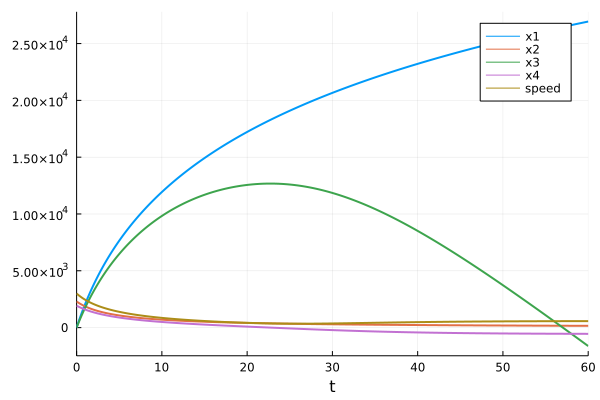

In [130]:
pt! = @ode_def ProjectileTrajectory begin
    dx1=x2
    dx2=*(-a,^(x2,2))
    dx3=x4
    dx4=-(*(*(-a,/(x4,abs(x4))),^(x4,2)),g)
    end a
u0=[0,vox,0,voy]
p=(0.0001,1)
tspan=(0,60)
problem=ODEProblem(pt!,u0,tspan,p)
solution=solve(problem,saveat=0.01)
rng=range(0,stop=60,length=6001)
yh=[0]
for i in 2:6001
    yh=vcat(yh,solution.u[i][3])
end
xp=[vox]
for i in 2:6001
    xp=vcat(xp,solution.u[i][2])
end
yp=[voy]
for i in 2:6001
    yp=vcat(yp,solution.u[i][4])
end
vp=[sqrt(+(^(vox,2),^(voy,2)))]
for i in 2:6001
    vp=vcat(vp,sqrt(+(^(xp[i],2),^(yp[i],2))))
end
plot(solution,lw=2)
plot!(rng,sqrt.(.+(.^(xp,2),.^(yp,2))),lw=2,label="speed")

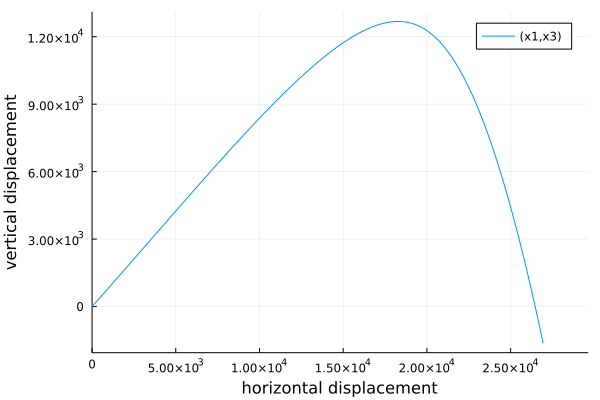

In [128]:
plot(solution,vars=(1,3),xaxis="horizontal displacement",yaxis="vertical displacement")

In [110]:
findmin(vp) # minimum speed after 26.3 seconds

(345.23262289775107, 2631)

In [123]:
findmax(yh) # maximum altitude after 22.7 seconds is approximately 12677 feet

(12676.57727159278, 2273)

In [51]:
solution(57.025383)[3] # total time of flight is 57.0 seconds

5.4403159907326354e-5

In [126]:
vp[5703] # terminal speed is approximately 567 feet per second

566.7303764613309

In [122]:
solution[5703][1] # range is approximately 26465 feet

26464.723315442818

In [6]:
B=[0 3 4
    0 0 6
    0 0 0]

3×3 Matrix{Int64}:
 0  3  4
 0  0  6
 0  0  0

In [7]:
B^2

3×3 Matrix{Int64}:
 0  0  18
 0  0   0
 0  0   0

In [8]:
B^3

3×3 Matrix{Int64}:
 0  0  0
 0  0  0
 0  0  0

In [1]:
using SymPy

In [2]:
@vars t

(t,)

In [3]:
A=[3 2 2
-5 -4 -2
5 5 3]

3×3 Matrix{Int64}:
  3   2   2
 -5  -4  -2
  5   5   3

In [4]:
x0=[1 0 -1]

1×3 Matrix{Int64}:
 1  0  -1

In [5]:
x0=transpose(x0)

3×1 transpose(::Matrix{Int64}) with eltype Int64:
  1
  0
 -1

In [6]:
exp(A*t)*x0

3×1 Matrix{Sym}:
              exp(t)
 -exp(t) + exp(-2*t)
          -exp(-2*t)

In [7]:
A=[3 2 0 0
-1 0 3 2
7 5 0 0
0 -1 7 5]

4×4 Matrix{Int64}:
  3   2  0  0
 -1   0  3  2
  7   5  0  0
  0  -1  7  5

In [8]:
b=transpose([0 -3 -2 0])

4×1 transpose(::Matrix{Int64}) with eltype Int64:
  0
 -3
 -2
  0

In [9]:
inv(A)*b

4×1 Matrix{Float64}:
   4.000000000000014
  -5.999999999999998
  17.00000000000013
 -25.00000000000018

In [2]:
using Random

In [6]:
rand(["Mozart","Bach"])

"Bach"

In [9]:
shuffle(["A" "B" "C" "D"])

1×4 Matrix{String}:
 "B"  "D"  "C"  "A"

In [10]:
shuffle(1:10)

10-element Vector{Int64}:
  5
 10
  3
  8
  7
  2
  6
  9
  1
  4

In [19]:
randsubseq(1:8, 0.5)

4-element Vector{Int64}:
 2
 3
 5
 8

In [21]:
shuffle(23:32)

10-element Vector{Int64}:
 31
 32
 25
 27
 29
 28
 23
 24
 30
 26